## Beyond Stoner-Wohlfarth Single-grain easy axis model


In [ ]:
import sys
from pathlib import Path
import os

# Get project root (parent of notebooks/)
PROJECT_ROOT = Path.cwd().parent.resolve()

# Add project root to Python path so src/ is importable
sys.path.insert(0, str(PROJECT_ROOT))

# Change working directory to project root
os.chdir(PROJECT_ROOT)

In [2]:
from scripts.analyze_magnetic_data import analyze_magnetic_data

### Data Pre-Processing
- [TODO] describe the data here, input and output variables, how they were generated

Shape of the DataFrame: (1497, 10)
No missing values in the DataFrame.
Basic statistics:
           Ms (A/m)       A (J/m)     K (J/m^3)  k1_theta  k1_phi  \
count  1.497000e+03  1.497000e+03  1.497000e+03    1497.0  1497.0   
mean   2.346634e+06  4.980778e-12  4.441019e+06       0.0     0.0   
std    9.683073e+05  2.883746e-12  2.811746e+06       0.0     0.0   
min    1.070453e+05  1.017197e-13  2.261398e+04       0.0     0.0   
25%    1.580172e+06  2.450223e-12  2.000995e+06       0.0     0.0   
50%    2.342924e+06  4.897740e-12  4.172896e+06       0.0     0.0   
75%    3.144879e+06  7.486598e-12  6.794677e+06       0.0     0.0   
max    3.973858e+06  9.998594e-12  9.995108e+06       0.0     0.0   
range  3.866813e+06  9.896874e-12  9.972494e+06       0.0     0.0   

            h_theta         h_phi      Hc (A/m)      Mr (A/m)  BHmax (J/m^3)  
count  1.497000e+03  1.497000e+03  1.497000e+03  1.497000e+03   1.497000e+03  
mean   1.788878e-02  1.570796e+00  2.095104e+06  1.895113e+06 

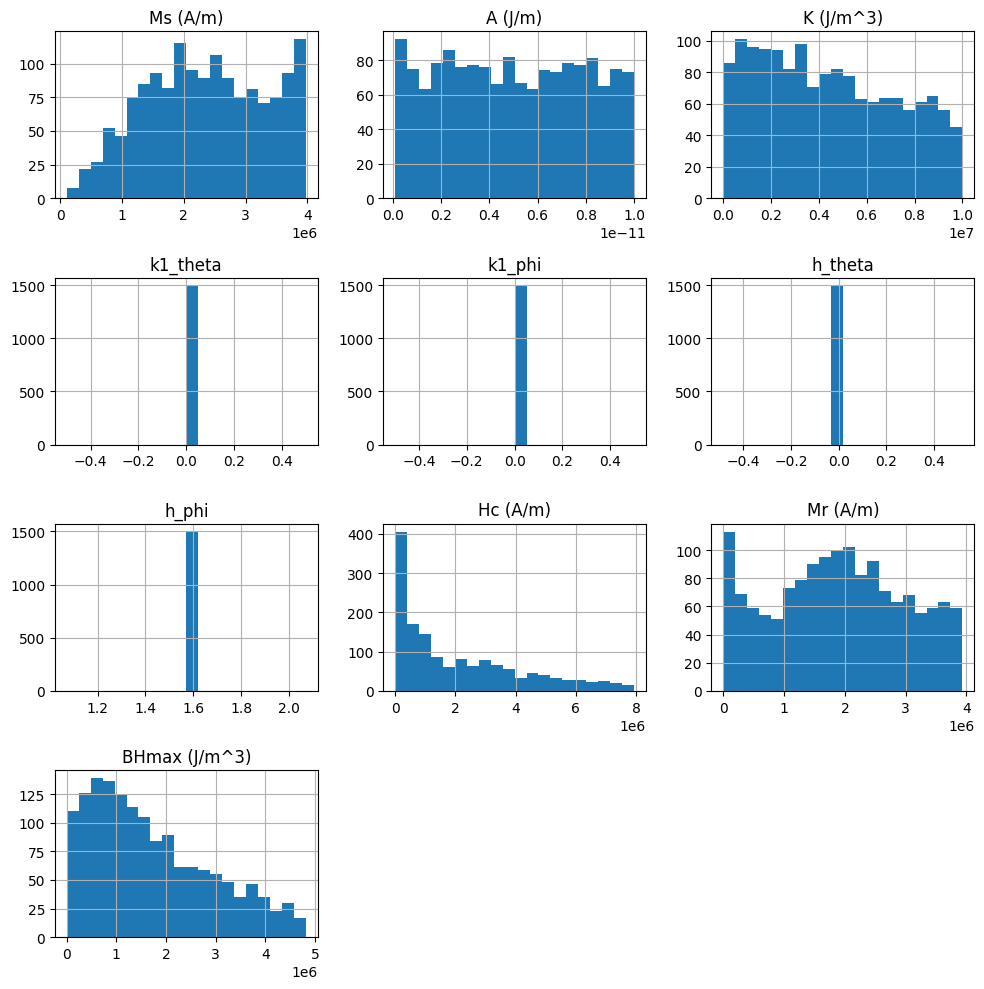

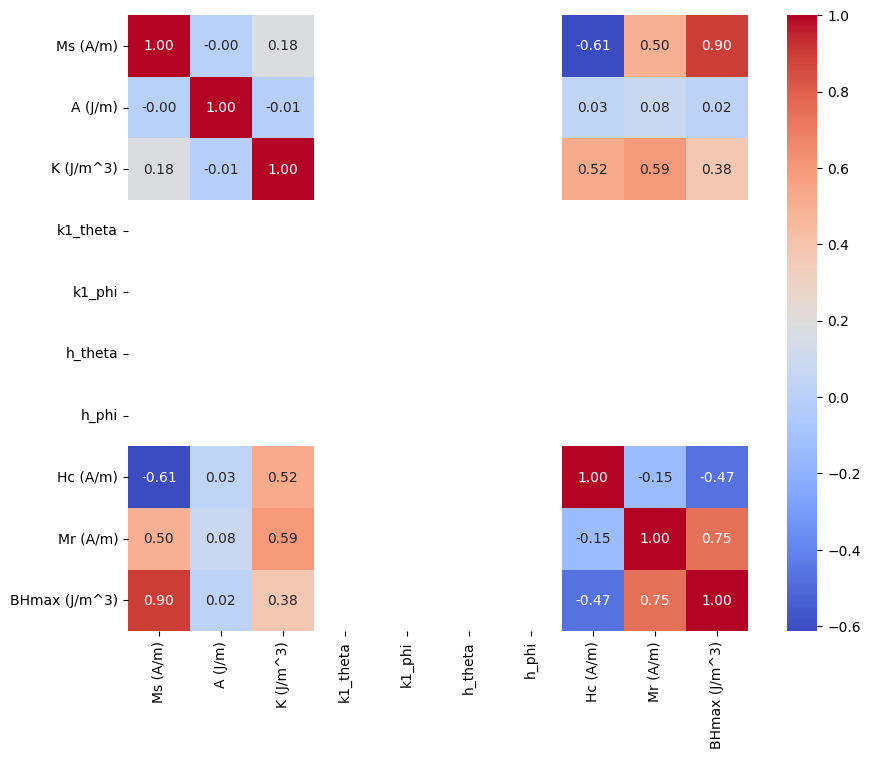

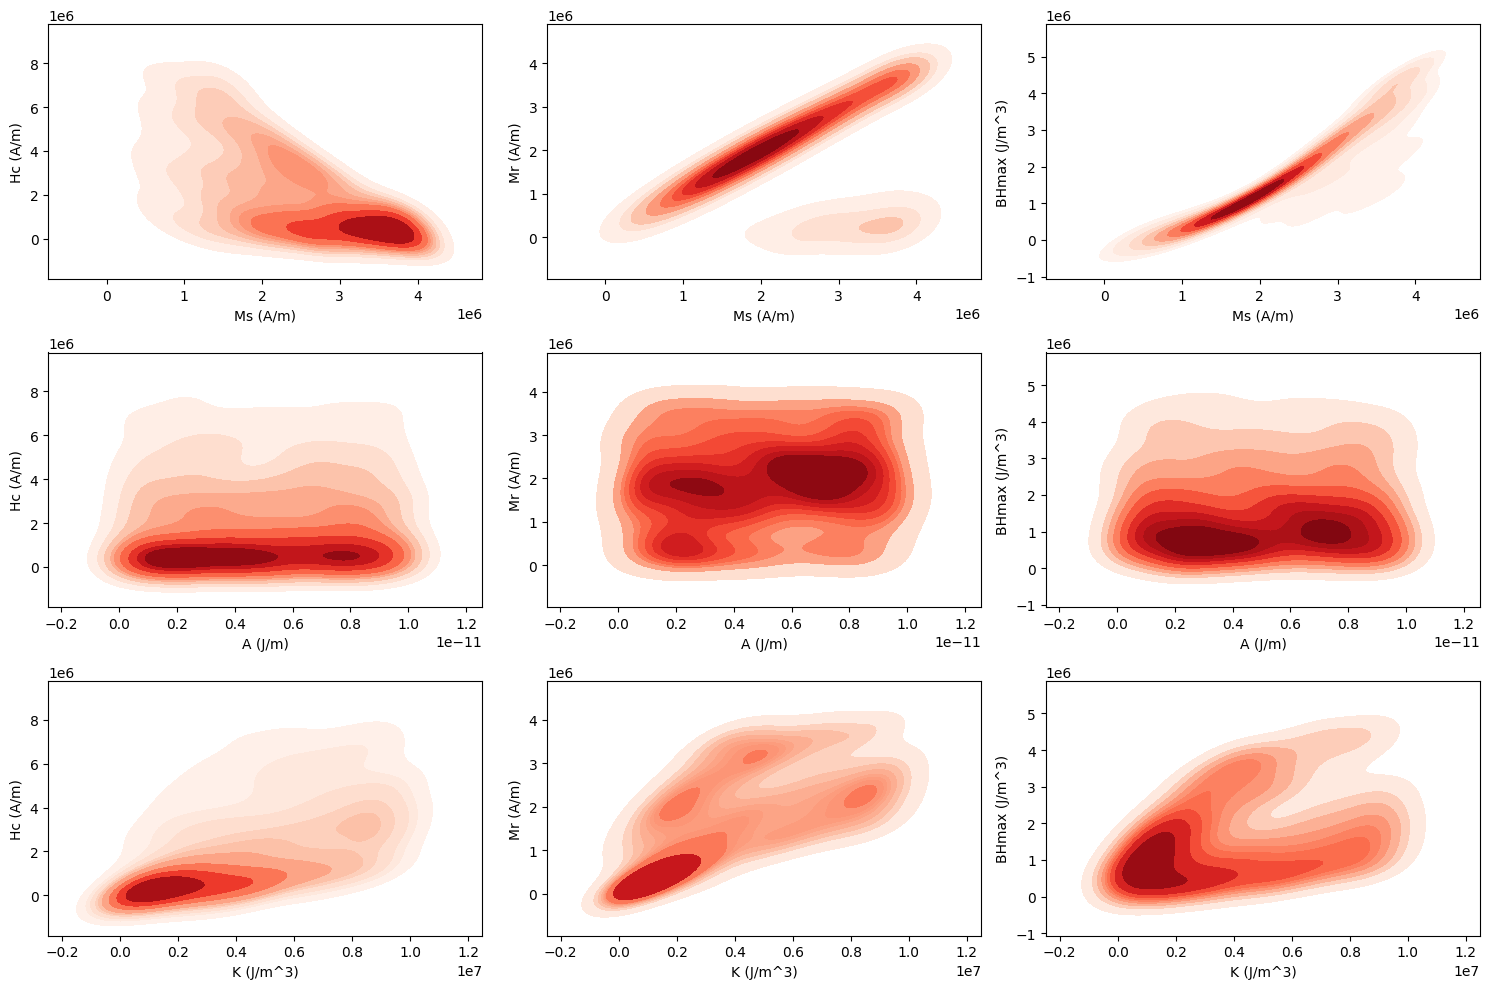

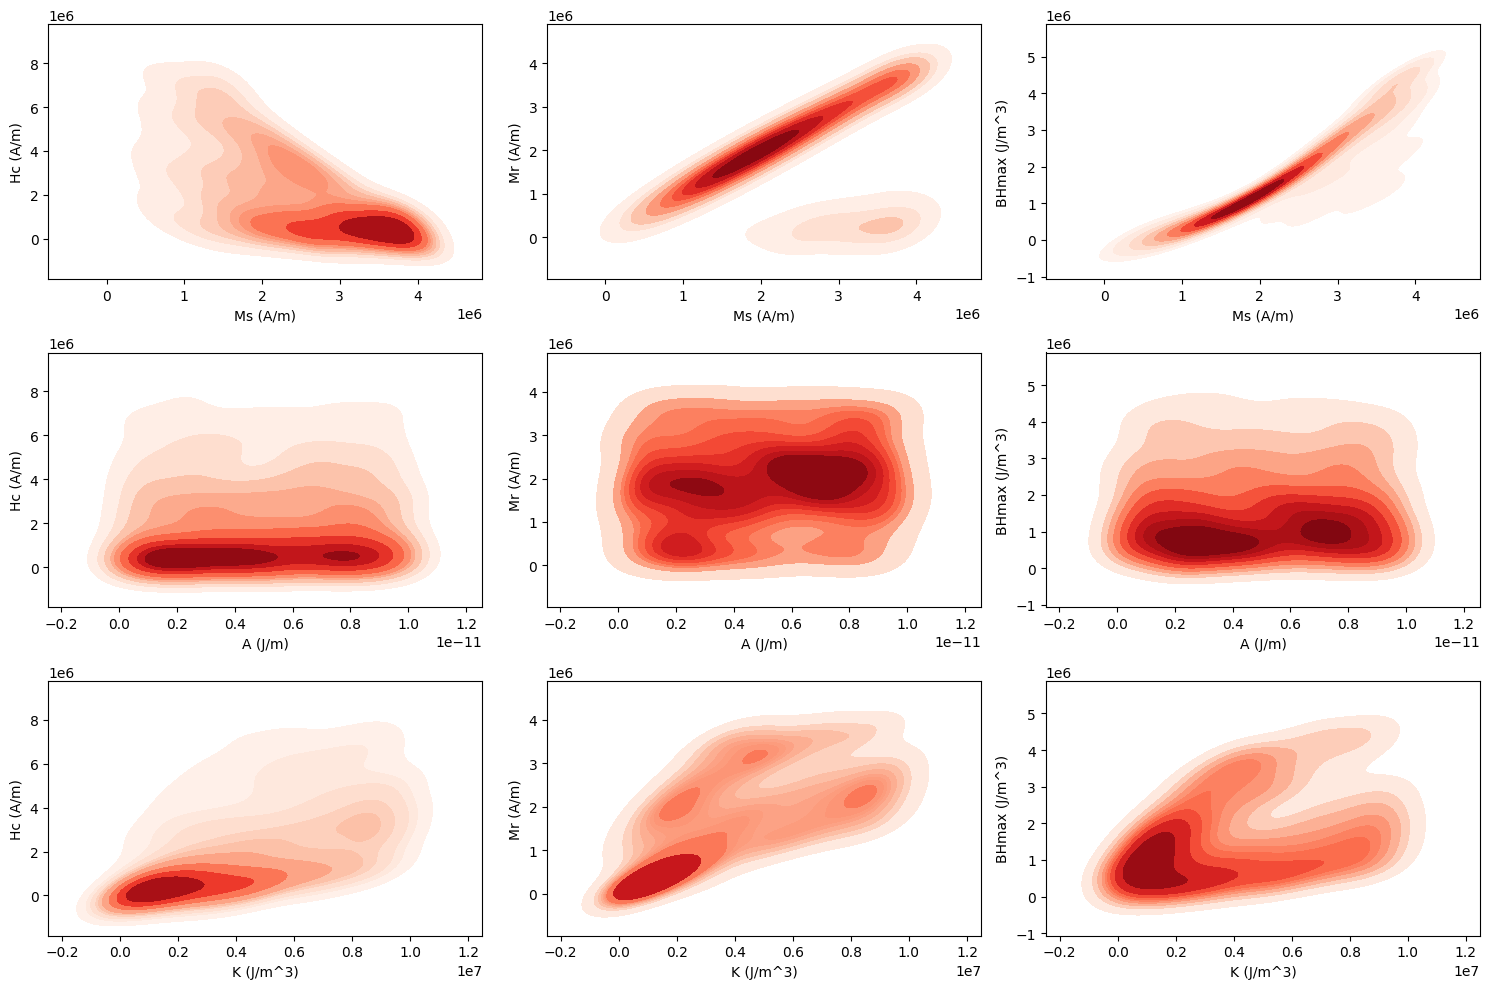

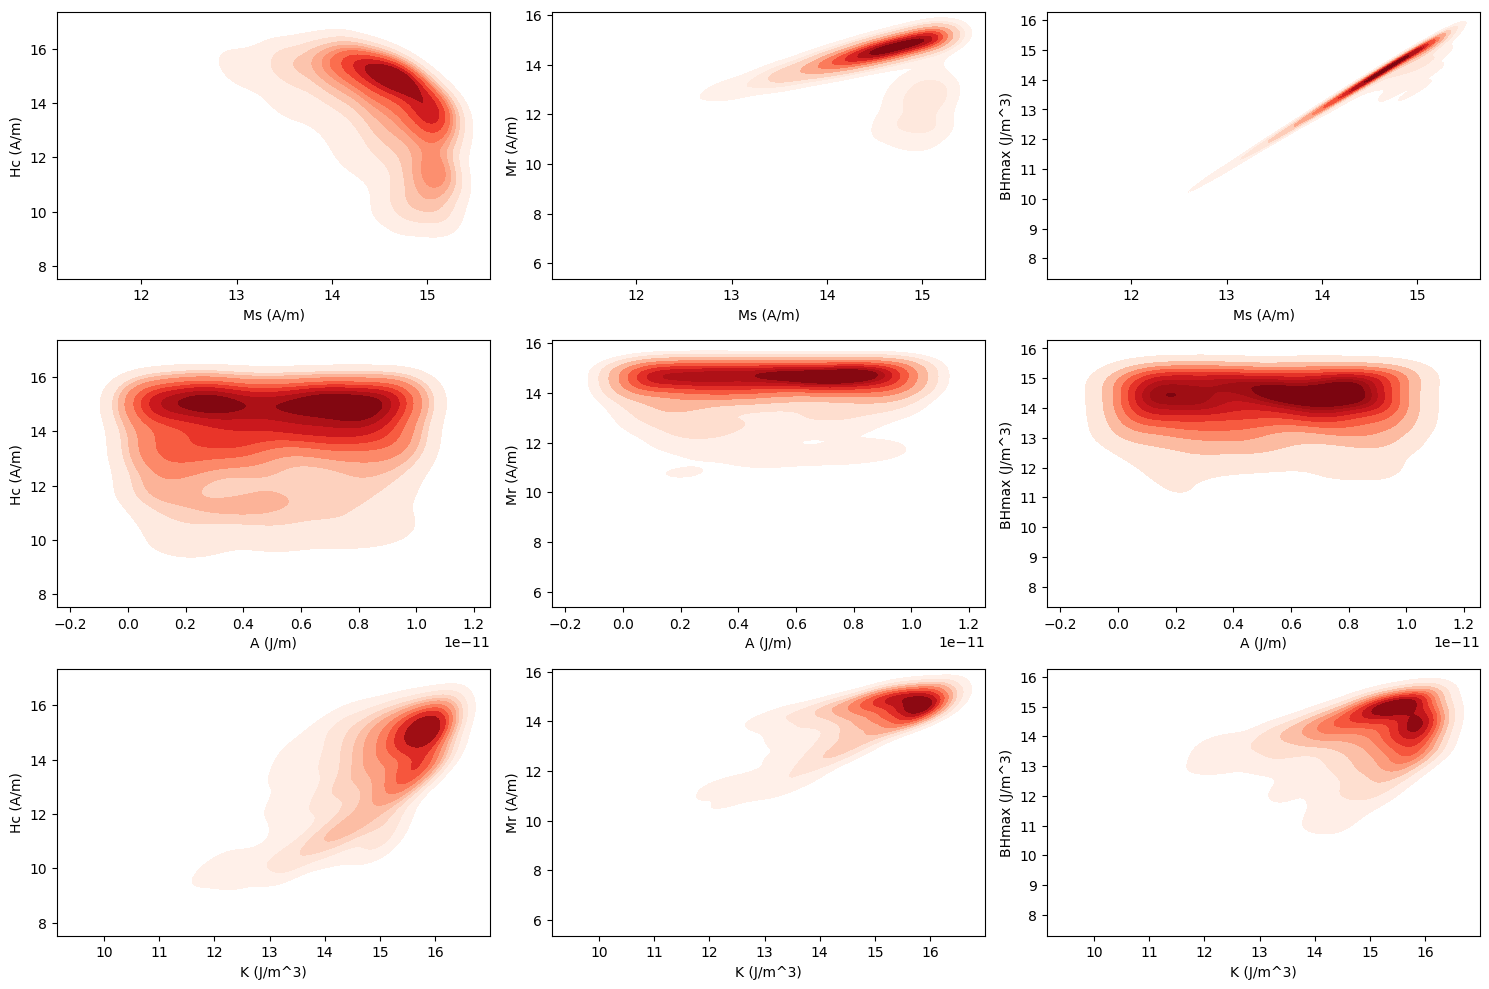

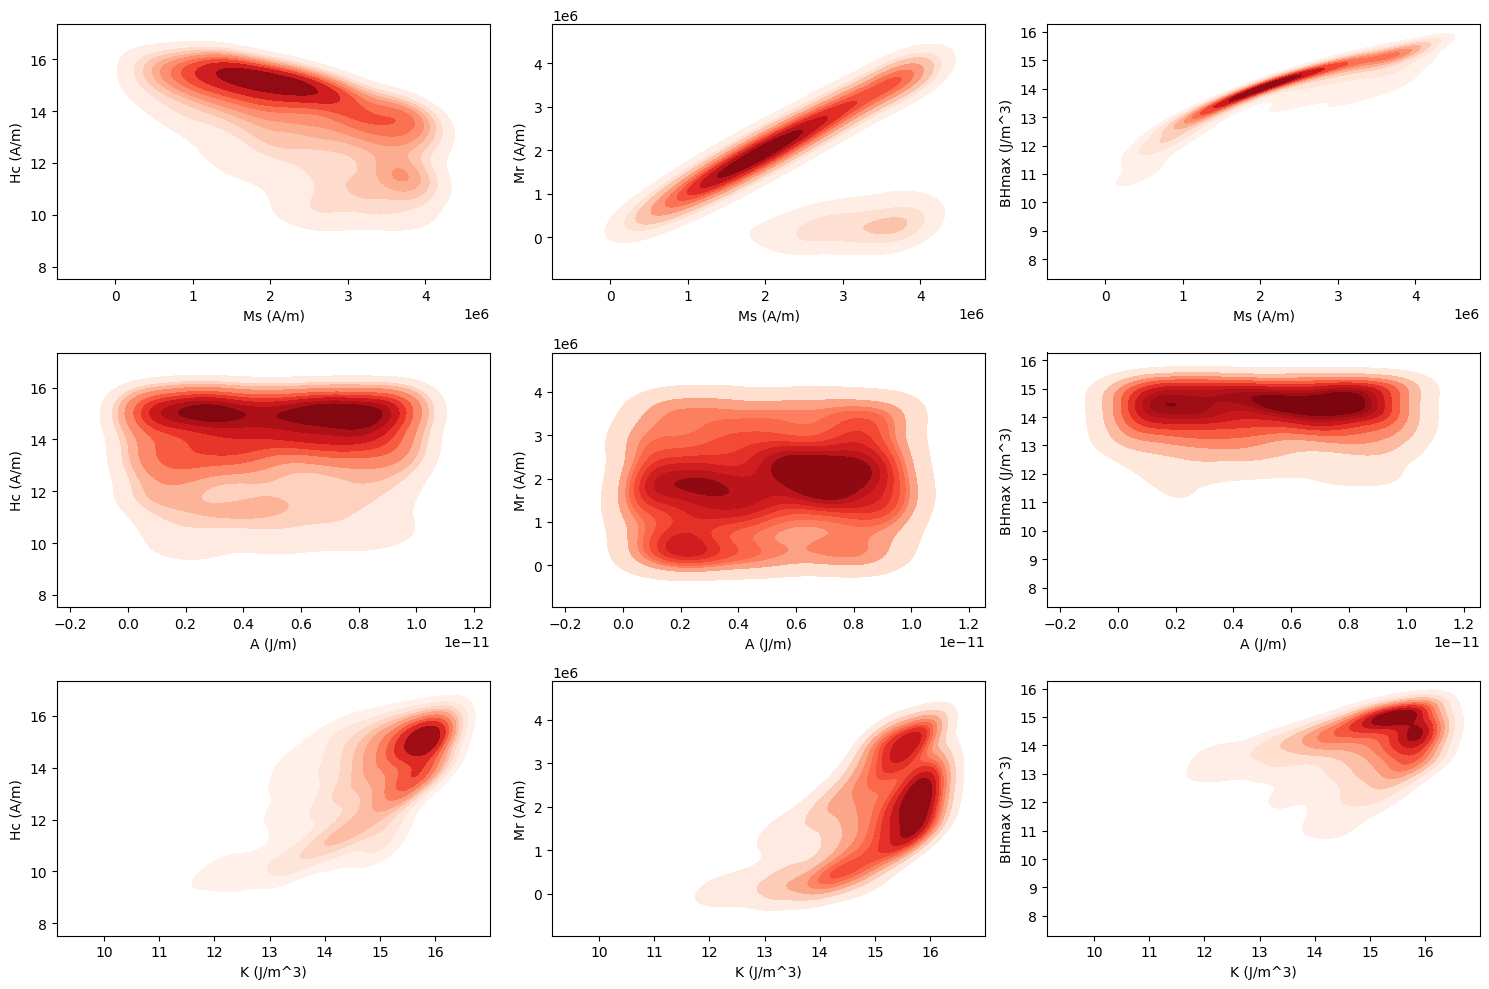

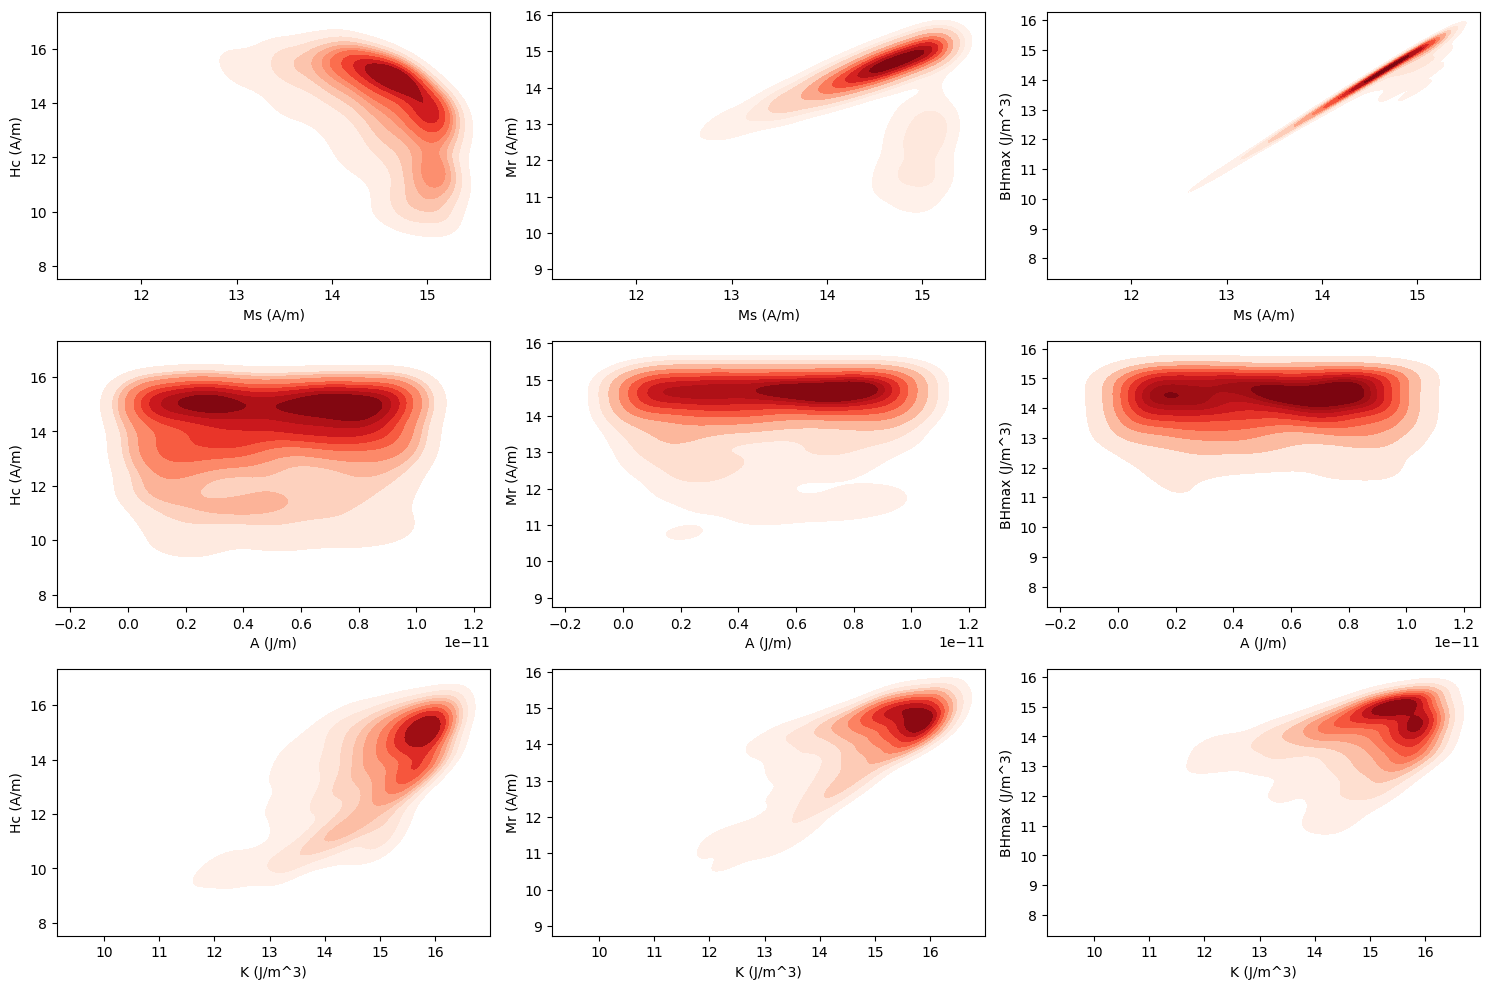

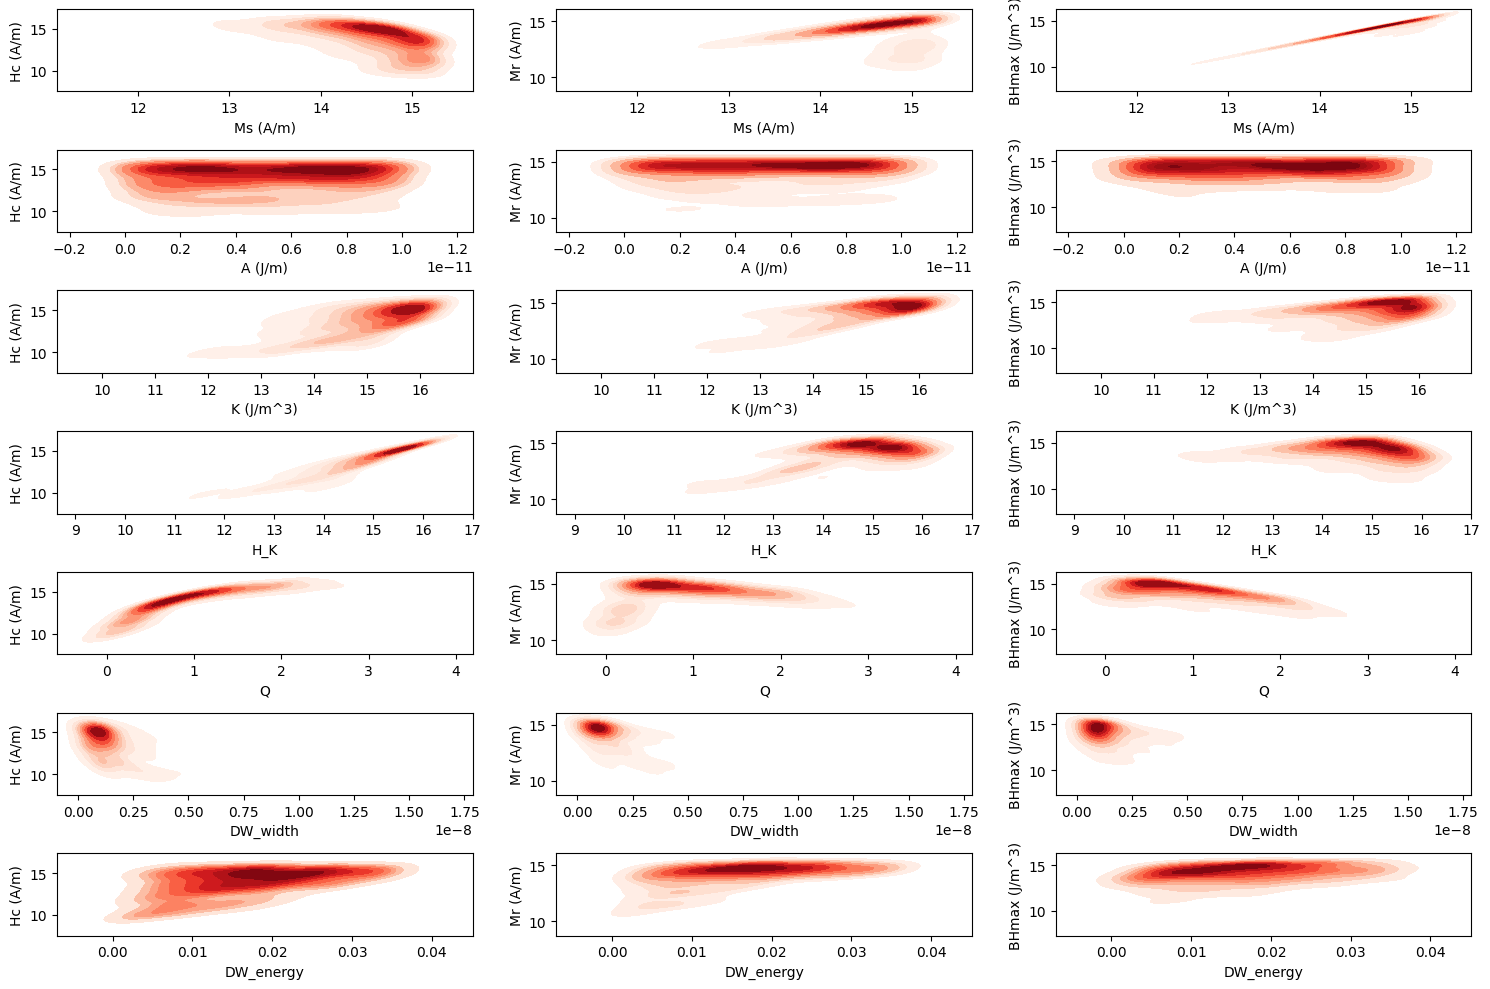

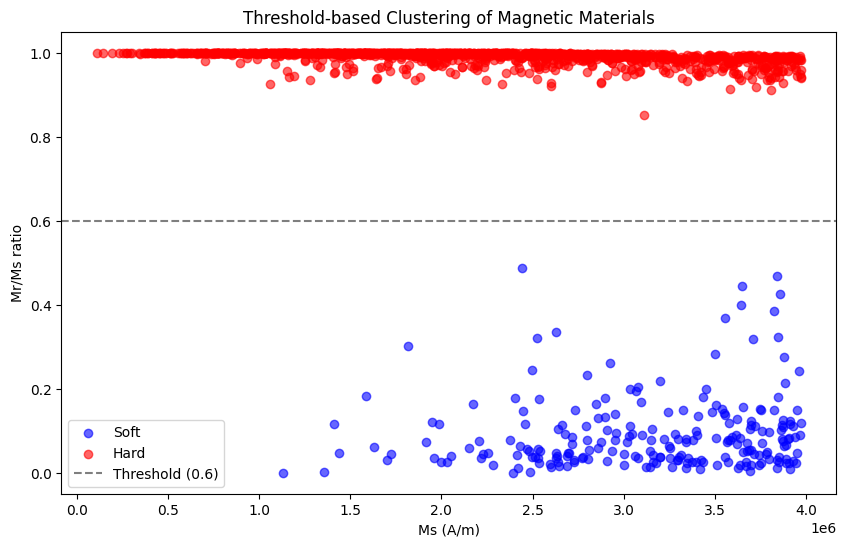


Threshold clustering results:
Number of soft magnets:  225
Number of hard magnets:  1272


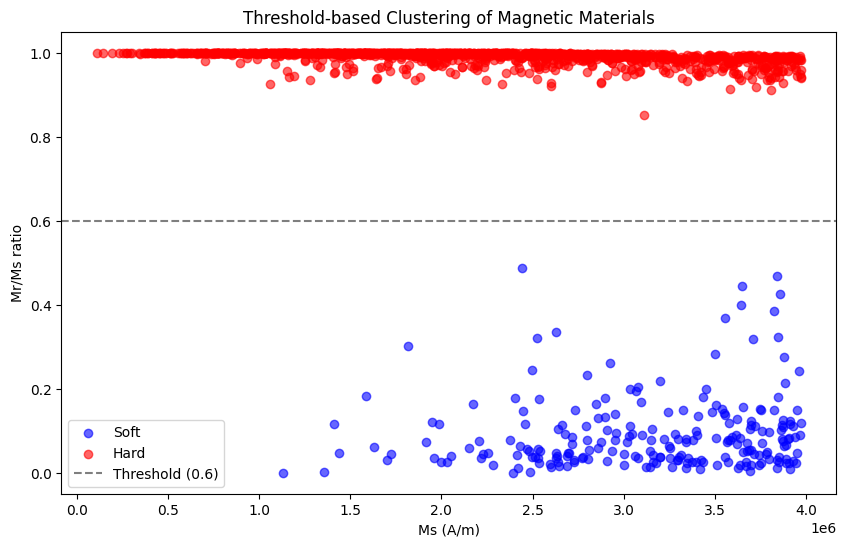

Training supervised classification model...
Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] END .............................estimator__max_depth=4; total time=   0.7s
[CV] END .............................estimator__max_depth=2; total time=   0.6s
[CV] END .............................estimator__max_depth=2; total time=   0.6s
[CV] END .............................estimator__max_depth=2; total time=   0.6s
[CV] END .............................estimator__max_depth=6; total time=   0.6s
[CV] END .............................estimator__max_depth=8; total time=   0.6s
[CV] END ............................estimator__max_depth=14; total time=   0.7s
[CV] END ............................estimator__max_depth=12; total time=   0.7s
[CV] END ............................estimator__max_depth=12; total time=   0.6s
[CV] END .............................estimator__max_depth=6; total time=   0.7s
[CV] END .............................estimator__max_depth=6; total time=   0.7s
[CV] 

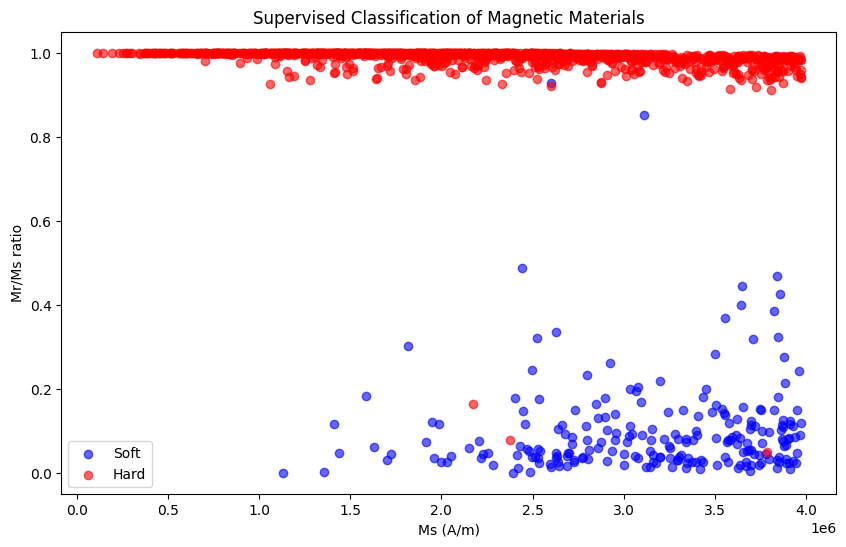

In [3]:
analyze_magnetic_data(data_path='./data/magnetic_materials.csv')

### Model training

In [4]:
from scripts.train_model import MLPipeline
import argparse

In [5]:
configpath = 'config/ml_config_test.yaml'

In [6]:
pipeline = MLPipeline(configpath)


Loaded configurations:
{
  "LogTransformation": {
    "remove_negative": true,
    "convert_to_tesla": false,
    "apply_log_transform": true
  }
}


Dataset loaded successfully
Dataset shape: (1497, 11)

Using clustering method: supervised
Loaded pipeline from /home/christina-winkler/Projects/ML-models/beyond-stoner-wohlfarth/single-grain-easy-axis-model/plots/supervised_clustering_pipeline.joblib
Applied pre-trained supervised clustering model
Total samples: 1497
Cluster 0 samples: 224
Cluster 1 samples: 1273
Processed dataset: LogTransformation_all
Processed dataset: LogTransformation_cluster0
Processed dataset: LogTransformation_cluster1

Training and evaluating random_forest...

Processing all dataset...

Training random_forest on LogTransformation_all...
Using scaler: standard
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters: {'max_depth': 20}
Best score: 0.07735419223225985
Feature importance plot saved to results/plots/LogTransformation_all/random_forest/feature_importance_LogTransformation_all_standard.png
Best parameters: {'max_depth': 20}
Computing jackknife variance for Random Forest model...
Ja

/home/christina-winkler/Projects/ML-models/beyond-stoner-wohlfarth/bsw-models/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:670: ConvergenceWarning: lbfgs failed to converge after 25 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Final kernel: 1**2 * RationalQuadratic(alpha=0.0321, length_scale=0.493)
Best parameters: {'kernel': {'type': 'RationalQuadratic', 'alpha': 100.0, 'length_scale': 1.5}, 'n_restarts_optimizer': 2, 'alpha': 1e-06}

==== gaussian_process Metrics for LogTransformation_all ====


=== OVERALL METRICS (Averaged Across All Outputs) ===

Train Metrics:
MSE   : 0.0000
MAE   : 0.0000
R²    : 1.0000
Adj R²: 1.0000
MAPE  : 0.00 %
Gini  : -0.3549

Test Metrics:
MSE   : 0.1555
MAE   : 0.0810
R²    : 0.8881
Adj R²: 0.8869
MAPE  : 0.76 %
Gini  : -0.3549

=== PER-VARIABLE METRICS ===

--- Hc (A/m) ---

Train Metrics:
MSE   : 0.0000
MAE   : 0.0000
R²    : 1.0000
Adj R²: 1.0000
MAPE  : 0.00 %
Gini  : -0.3644

Test Metrics:
MSE   : 0.0480
MAE   : 0.0795
R²    : 0.9830
Adj R²: 0.9829
MAPE  : 0.71 %
Gini  : -0.3644

--- Mr (A/m) ---

Train Metrics:
MSE   : 0.0000
MAE   : 0.0000
R²    : 1.0000
Adj R²: 1.0000
MAPE  : 0.00 %
Gini  : -0.3493

Test Metrics:
MSE   : 0.4172
MAE   : 0.1520
R²    : 0.6826
Adj R²: 0.6

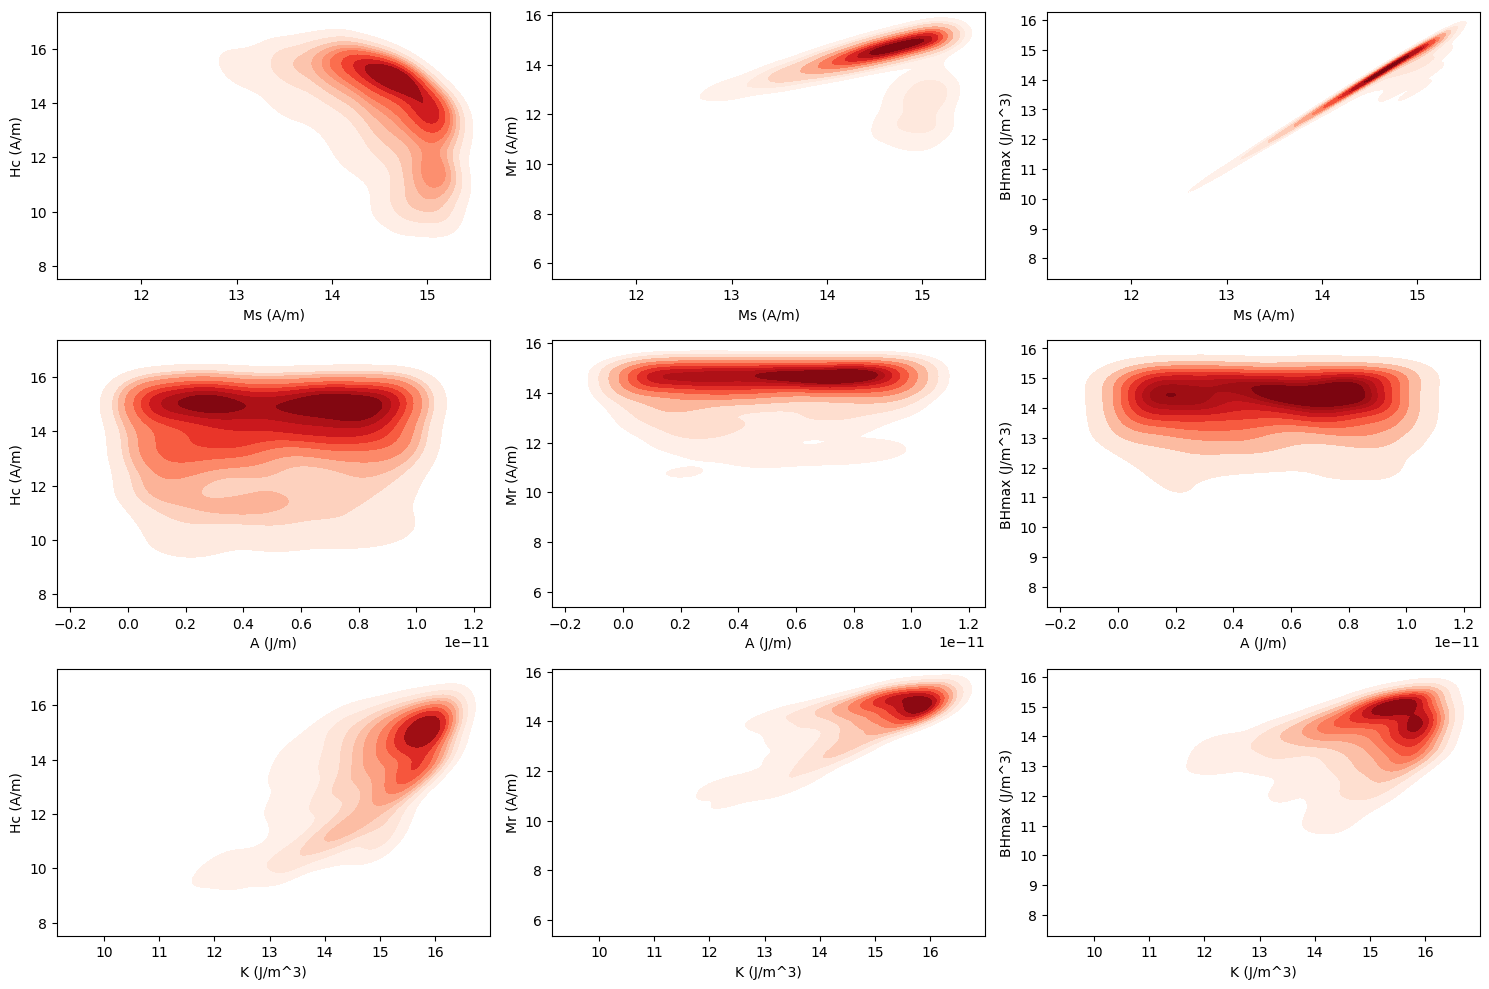

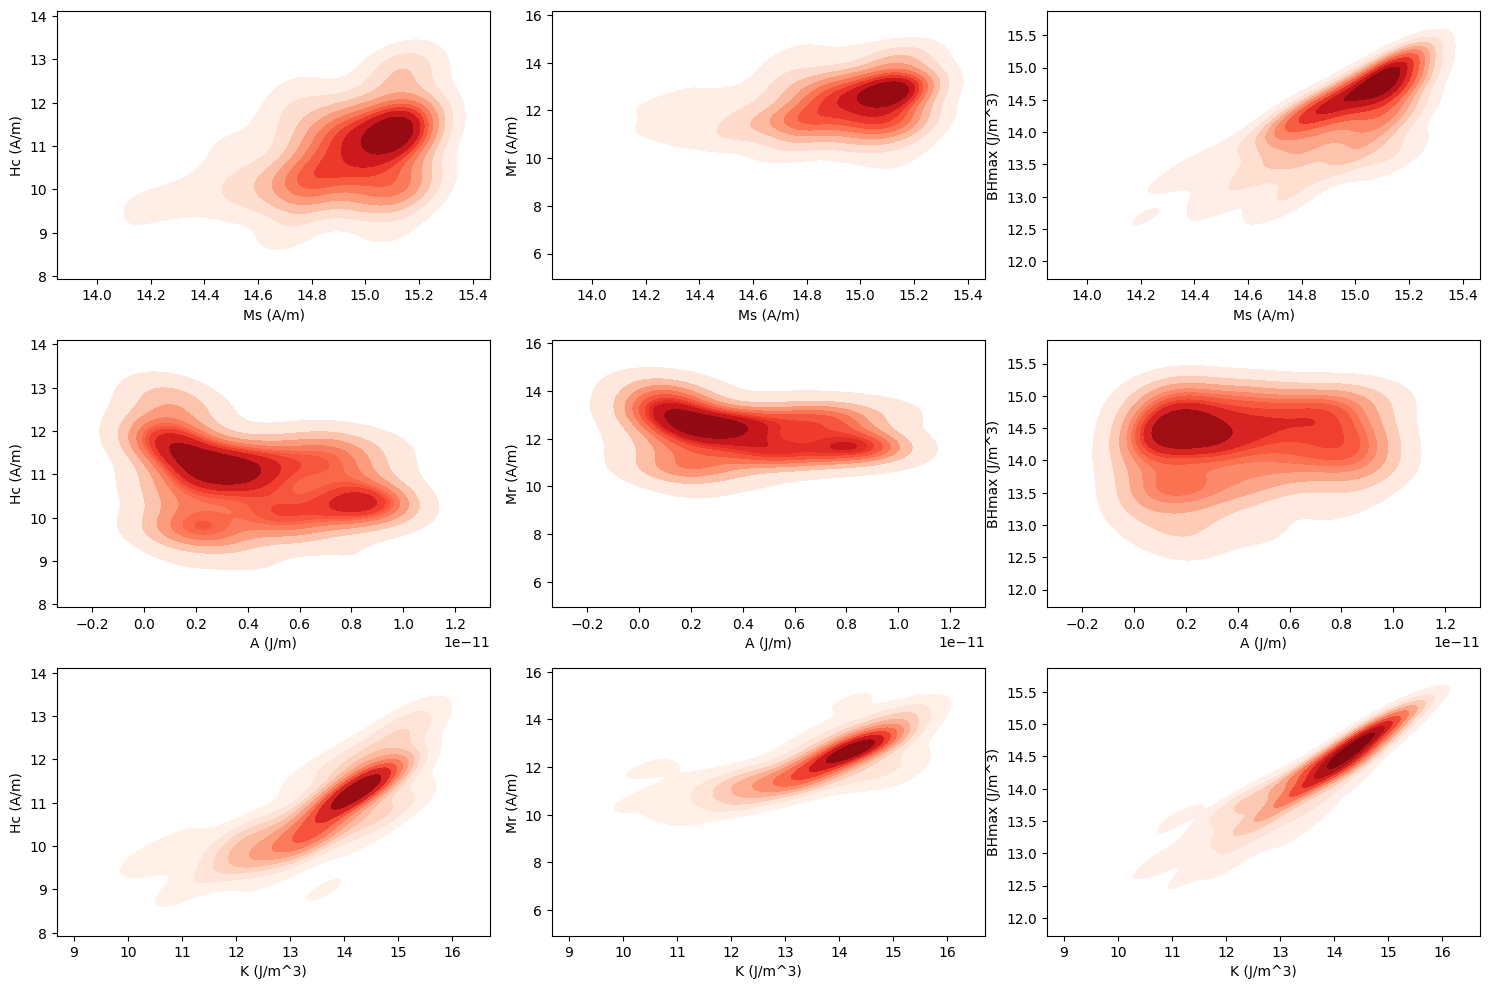

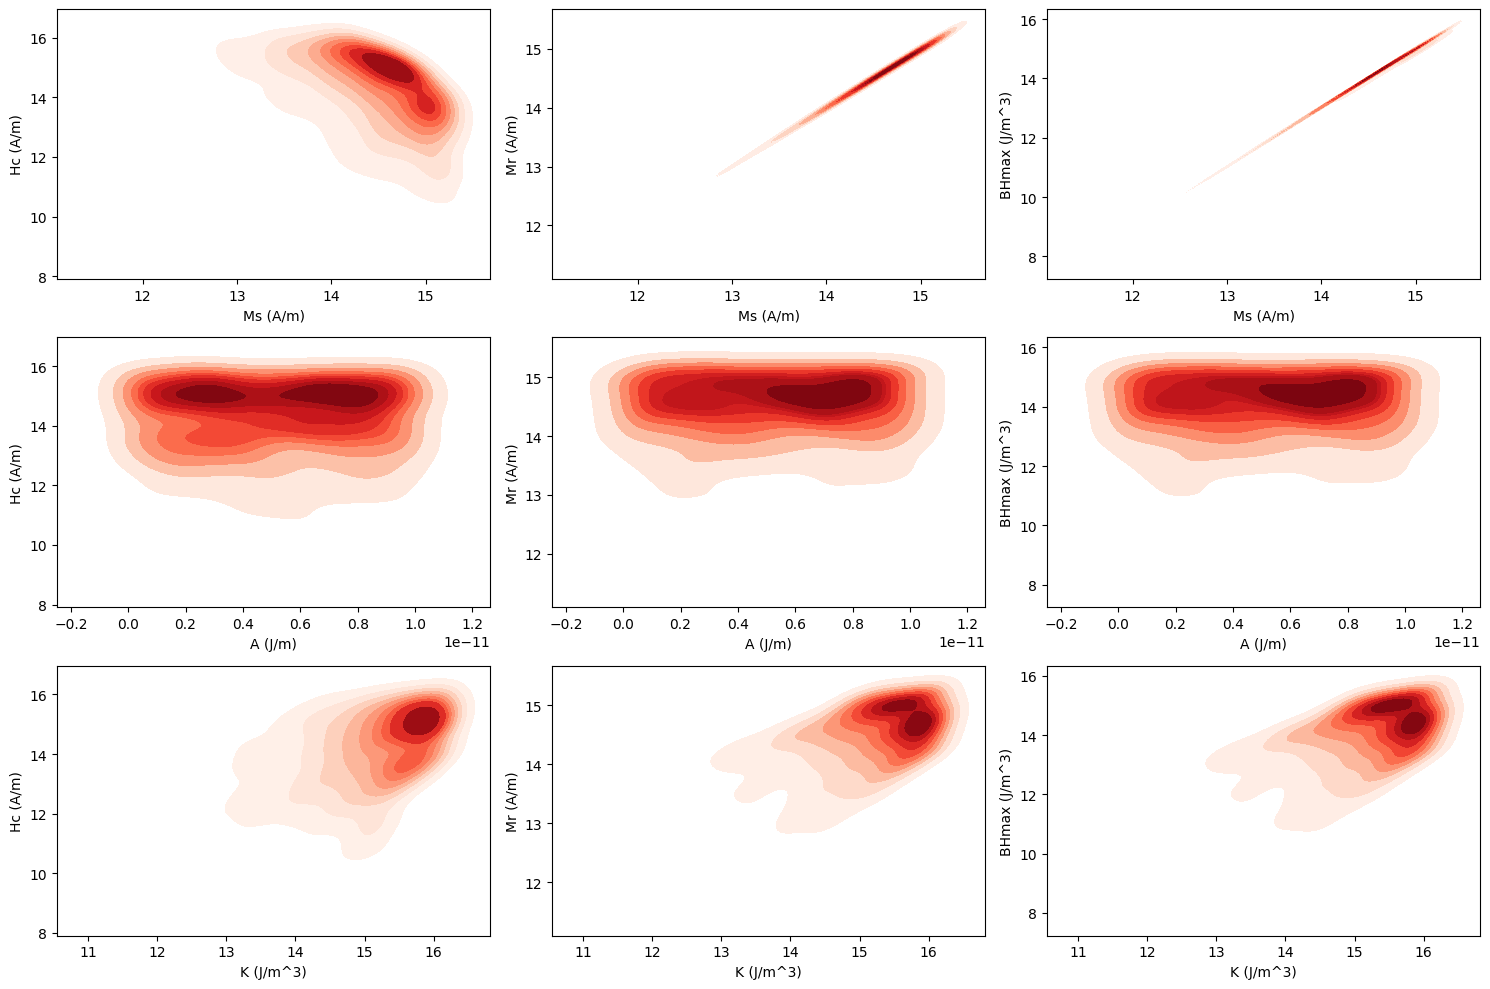

In [7]:
pipeline.run()

### Plot Metrics

In [8]:
from scripts.plot_metrics import *

In [9]:
results_dir = 'results/'

In [10]:
output = 'results/metric_tables'

In [11]:
# Set matplotlib style
plt.style.use('ggplot')

In [12]:
# Set default output directory as a subdirectory of the input directory
results_path = Path(results_dir)
if output is None:
    output_path = results_path / "metric_tables"
else:
    output_path = Path(output)

In [13]:
# Create output directory
output_path.mkdir(parents=True, exist_ok=True)

In [14]:
# Load results
results = load_results(results_dir)

In [15]:
# Create tables
create_metric_tables(results, output_path)
        
print(f"Tables and plots generated successfully in {output_path}")

Processing all data...
  Creating tables for dataset: LogTransformation_all_standard
    Saved overall metrics to results/metric_tables/LogTransformation_all_standard_overall_metrics.html
    Saved metrics plot to results/metric_tables/LogTransformation_all_standard_Overall_metrics.png
    Creating table for variable: Mr (A/m)
    Saved Mr (A/m) metrics to results/metric_tables/LogTransformation_all_standard_Mr__A_m__metrics.html
    Saved metrics plot to results/metric_tables/LogTransformation_all_standard_Mr__A_m__metrics.png
    Creating table for variable: BHmax (J/m^3)
    Saved BHmax (J/m^3) metrics to results/metric_tables/LogTransformation_all_standard_BHmax__J_m_3__metrics.html
    Saved metrics plot to results/metric_tables/LogTransformation_all_standard_BHmax__J_m_3__metrics.png
    Creating table for variable: Hc (A/m)
    Saved Hc (A/m) metrics to results/metric_tables/LogTransformation_all_standard_Hc__A_m__metrics.html
    Saved metrics plot to results/metric_tables/LogT